In [1]:
#!/usr/bin/env python
# coding: utf-8

# Filter Methods for Features Selection

# Information Gain

In[7]:

In [2]:
import pandas as pd
dataframe=pd.read_csv('diabetes.csv')
dataframe.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In[8]:

In [3]:
dataframe.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In[18]:

In [4]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif

In [5]:
dataframe=pd.read_csv('diabetes.csv')
X= dataframe.iloc[:,0:8]
Y = dataframe['Outcome']

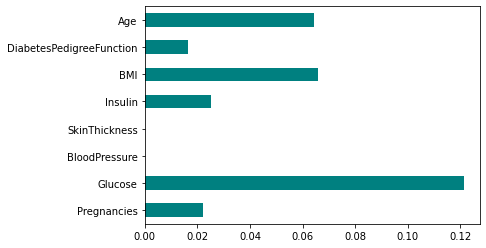

In [6]:
importance = mutual_info_classif (X,Y)
feat_importance = pd.Series (importance , dataframe.columns [0:len(dataframe.columns)-1])
ax = feat_importance.plot ( kind ='barh', color ='teal')
fig = ax.get_figure()
fig.savefig('figure_IGFS.pdf')

# x2 test:

In[25]:

In [7]:
import pandas as pd
data = pd.read_csv('Churn_Modelling.csv')
churn_df = pd.DataFrame(data)
churn_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In[30]:

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np
import seaborn as sns

In[26]:

In [9]:
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
churn_df_sel = pd.read_csv('Churn_Modelling.csv')
churn_df_sel.head()
churn_df_sel = churn_df.loc [: ,['Geography','Gender','HasCrCard', 'IsActiveMember','Exited']]
churn_df_sel.head ()

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,France,Female,1,1,1
1,Spain,Female,0,1,0
2,France,Female,1,0,1
3,France,Female,0,0,0
4,Spain,Female,1,1,0


In[41]:

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder = LabelEncoder()
churn_df_sel['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
churn_df_sel['Gender'] = label_encoder.fit_transform(churn_df['Gender'])
churn_df_sel.head(2)

,Geography,Gender,HasCrCard,IsActiveMember,Exited
0,0,0,1,1,1
1,2,0,0,1,0


In[46]:

In [12]:
from sklearn.feature_selection import chi2
X = churn_df_sel.drop ('Exited',axis =1)
y = churn_df_sel['Exited']
# chi square test with 95% confidence interval
chi_scores = chi2(X,y)
print(churn_df_sel.shape)
chi_scores[0]

(10000, 5)


array([ 11.85325057,  51.53992627,   0.15004097, 118.19941432])

In[37]:

In [13]:
p_values = pd.Series(chi_scores[1] , index=X.columns)
print (p_values[:])
p_values.sort_values(ascending=True , inplace=True)

Geography         5.756078e-04
Gender            7.015575e-13
HasCrCard         6.984962e-01
IsActiveMember    1.568036e-27
dtype: float64


In[70]:

In [14]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectPercentile
X_new = SelectPercentile(chi2 , percentile =50) 
#X_new.fit_transform(X , y)
feature_names = ['HasCrCard', 'IsActiveMember','Exited']

use percentile method

In [15]:
X_new = SelectKBest (chi2 , k = 3)
# k best method
X_new.fit_transform(X , Y)

ValueError: Found input variables with inconsistent numbers of samples: [10000, 768]

In[57]:

In [ ]:
new_features = [] 
# The list of your K best features
mask = X_new.get_support()
# Print selected fatures
 # The list of your K best features
new_features = []
for bool , feature in zip(mask , feature_names) :
    if bool :
        new_features.append(feature)
new_features

# EXAMPLES:

In[79]:

In [ ]:
get_ipython().system('pip install scipy-stats')

In[75]:

In [ ]:
from scipy.stats import chi_contingency
from scipy.stats import chi1

In [ ]:
table = [[250,200],[50,1000]]
print(table)
stat,p , dof, expected = chi2_contingency(table)
print('dof=%d')

# FISHER SCORE

In[22]:

In [ ]:
get_ipython().system('pip install skfeature_chappers')

In[81]:

In [24]:
from skfeature.function.similarity_based import fisher_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
data = pd.read_csv ('Churn_Modelling.csv')
df = pd.DataFrame(data)
churn_df = df.loc[: ,[ 'Geography','Gender','HasCrCard', 'IsActiveMember','Exited']]

label_encoder = LabelEncoder()
churn_df['Geography'] = label_encoder.fit_transform(churn_df['Geography'])
churn_df['Gender'] = label_encoder.fit_transform (churn_df['Gender' ])
X_train = churn_df.drop('Exited', axis =1)
y_train = churn_df['Exited']
# calculate score
rank = fisher_score.fisher_score(X_train.to_numpy(), y_train.to_numpy() ,mode ='rank')
print(rank)

ModuleNotFoundError: No module named 'sklearn.function'

In[82]:

In [22]:
feat_importances = pd.Series(rank , churn_df.columns[0: len (churn_df.columns)-1])
feat_importances.plot ( kind ='barh', color ='teal')
plt.show()

NameError: name 'rank' is not defined

# Correlation Coefficient & Variance method:<br>


In[14]:

<AxesSubplot:>

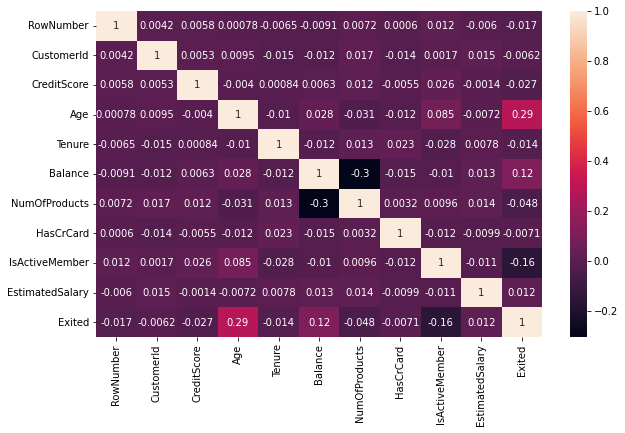

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
# corelation matrix
corr = churn_df.corr ()
plt.figure (figsize =(10 ,6))
sns.heatmap (corr,annot = True)

# VARIANCE THRESHOLD:

In[59]:

In [25]:
from sklearn.feature_selection import VarianceThreshold
v_threshold = VarianceThreshold (threshold=0)
v_threshold.fit (churn_df)
v_threshold.get_support()

ValueError: could not convert string to float: 'Hargrave'

# Mean Absolute Difference (MAD):

In[48]:

load data

In [17]:
import pandas as pd
import numpy as np
data = 'Iris.csv'
names = ['ID','sepalLength','sepalWidth','petalLength','petalWidth','species']
df = pd.read_csv (data,names=names)
df.head ()
X = df.iloc [: ,1:5]
Y = df.iloc [: ,5]
X.head()

,sepalLength,sepalWidth,petalLength,petalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In[83]:

In [18]:
mad = X.mad (axis =0);
print (" Mean absolute deviation of columns :");
print(mad);

 Mean absolute deviation of columns :
sepalLength    0.687556
sepalWidth     0.333093
petalLength    1.561920
petalWidth     0.658933
dtype: float64


# DISPERSION RATIO:

In[84]:

<BarContainer object of 4 artists>

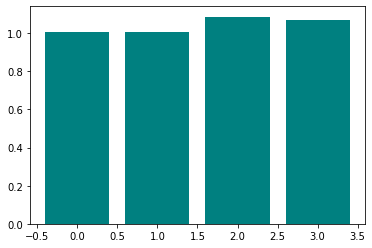

In [19]:
import matplotlib.pyplot as plt
X = X +1
am=0
gm=0
am = np.mean(X , axis =0)
gm = np.power(np.product(X , axis =0),1/ X.shape [0])
# ratio of arithmatic mean and geometric mean
disp_ratio = am/gm
plt.bar(np.arange(X.shape [1]),disp_ratio,color ='teal')

In[ ]: